In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import sklearn
%matplotlib inline

In [91]:
DATA_PATH = "../data/"

path = DATA_PATH + "Telco_data_clean.csv"

In [92]:
df = pd.read_csv(path)

In [93]:
df.head()

,Unnamed: 0,Churn Label,CLTV,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,...,Latitude,Longitude,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Population
0,0,1,5433,0,0,1,0,0,0.00,0,...,34.023810,-118.156582,1,78,0,1,0,0,0,68701
1,1,1,5302,1,1,8,5,1,48.85,1,...,34.044271,-118.185237,0,74,0,1,1,1,1,55668
2,2,1,3179,0,0,18,4,1,11.33,1,...,34.108833,-118.229715,1,71,0,1,0,1,3,47534
3,3,1,5337,1,1,25,3,1,19.76,0,...,33.936291,-118.332639,0,78,0,1,1,1,1,27778
4,4,1,2793,1,1,37,3,1,6.33,1,...,33.972119,-118.020188,0,80,0,1,1,1,1,26265


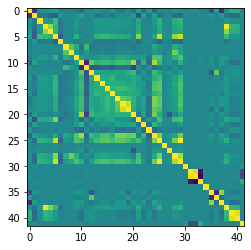

In [94]:
plt.imshow(df.corr())

In [95]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [96]:
from sklearn.preprocessing import LabelEncoder

In [97]:
def object_to_int(df):
    if df.dtype=='object':
        df = LabelEncoder().fit_transform(df)
    return df

In [98]:
df = df.apply(lambda x: object_to_int(x))
df.head()

,Churn Label,CLTV,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,...,Latitude,Longitude,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Population
0,1,5433,0,0,1,0,0,0.00,0,1,...,34.023810,-118.156582,1,78,0,1,0,0,0,68701
1,1,5302,1,1,8,5,1,48.85,1,1,...,34.044271,-118.185237,0,74,0,1,1,1,1,55668
2,1,3179,0,0,18,4,1,11.33,1,1,...,34.108833,-118.229715,1,71,0,1,0,1,3,47534
3,1,5337,1,1,25,3,1,19.76,0,1,...,33.936291,-118.332639,0,78,0,1,1,1,1,27778
4,1,2793,1,1,37,3,1,6.33,1,1,...,33.972119,-118.020188,0,80,0,1,1,1,1,26265


In [99]:
from sklearn.model_selection import train_test_split
target = 'Churn Label'
X = df.drop(target, axis=1)
Y = df[target]
training_features, testing_features, training_target, testing_target = train_test_split(X, Y,
                     test_size=0.1, train_size=None, random_state=None, shuffle=True, stratify=None)

In [100]:
training_features.head()

,CLTV,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,...,Latitude,Longitude,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Population
6175,5644,1,3,64,2,0,0.00,0,1,1,...,35.511833,-120.918713,0,28,1,0,1,1,3,3220
1994,2905,0,0,1,0,1,16.06,0,1,2,...,37.787186,-122.146330,1,44,0,0,0,0,0,24518
0,5433,0,0,1,0,0,0.00,0,1,1,...,34.023810,-118.156582,1,78,0,1,0,0,0,68701
1799,4773,0,0,1,0,1,8.77,0,1,1,...,34.091829,-118.491244,1,44,0,0,0,0,0,33523
6277,5631,0,0,13,4,1,38.40,1,1,1,...,37.601248,-122.403099,0,34,0,0,0,0,0,20350


#### Linear regression - Baseline

In [101]:
from sklearn.linear_model import LinearRegression

In [102]:
reg = LinearRegression().fit(training_features, training_target)

In [103]:
reg.score(testing_features, testing_target)

0.32877057957121425

#### Decision Tree

In [104]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth=3)
model.fit(training_features, training_target)

DecisionTreeRegressor(max_depth=3)

In [105]:
from sklearn.metrics import accuracy_score

In [106]:
pred = model.predict(testing_features)
print(testing_target.shape)
pred = np.where(pred < 0.5, 0, 1)
print(pred.shape)

(705,)
(705,)


In [107]:
accuracy_score(testing_target, pred)

0.7645390070921986

In [108]:
import graphviz
from sklearn import tree

In [109]:
dot_data = tree.export_graphviz(model, feature_names = list(training_features), filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data) 

In [110]:
graph.render(view=True)

'Source.gv.pdf'